In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as onp
import matplotlib.pyplot as plt
from ridgeRegression import *
from diffevol import *
from moleculToVector import *
from thetas import *
from xyz2bat import *
from jax import jacfwd
from jax import vmap

/home/gnovikov/miniconda3/envs/ml/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
structs_with_forces = read_dataset('forces/gphase/t-1/11_cis-pos-1.xyz', 'forces/gphase/t-1/forces')
structs_with_forces = structs_with_forces
struct_description, amber_coeffs = get_struct_description('test-Olesya/Initial_parameters_with_numbers_and_dihedrals_only.txt')
# dataset = get_dataset(structs_with_forces, struct_description)
test_structs = read_dataset('forces/gphase/t-4/11_cis-pos-1.xyz', 'forces/gphase/t-4/forces')

In [4]:
thetas = {
    'bonds': amber_coeffs.bonds_zero_values,
    'angles': amber_coeffs.angles_zero_values,
    'torsions': amber_coeffs.torsions_zero_phase,
    'ns': amber_coeffs.ns,
    'q': amber_coeffs.qs,
    'sigma_for_vdw': amber_coeffs.sigma_for_vdw,
    'epsilon_for_vdw': amber_coeffs.epsilons_for_vdw
}

In [ ]:
all_coords = np.array([struct.coords for struct in structs_with_forces])

/home/gnovikov/miniconda3/envs/ml/lib/python3.7/site-packages/jax/lib/xla_bridge.py:122: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [ ]:
energy = np.array([struct.energy for struct in structs_with_forces])
forces = np.array([struct.forces for struct in structs_with_forces])

In [ ]:
forces = forces.reshape(-1)

In [ ]:
# HH_map = xyz2bat2constr_HH_map(all_coords, struct_description.as_dict(), thetas)
# HH_map = HH_map.reshape(-1, HH_map.shape[-1])

forces error for train train:	12.054073333740234
forces error for test train:	8.166213035583496
energy correlation for test train:	-0.3469801268990409


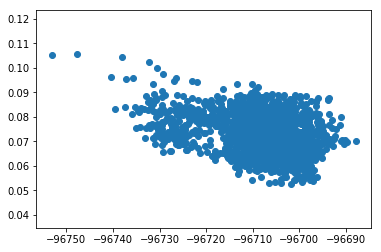



forces error for train train:	12.054073333740234
forces error for test train:	8.166213035583496
energy correlation for test train:	-0.3469801268990409


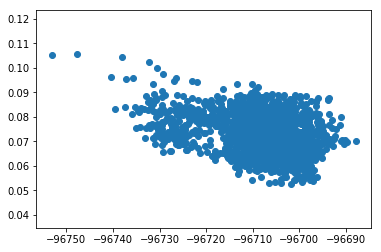



forces error for train train:	11.959305763244629
forces error for test train:	8.001346588134766
energy correlation for test train:	-0.3470853623768905


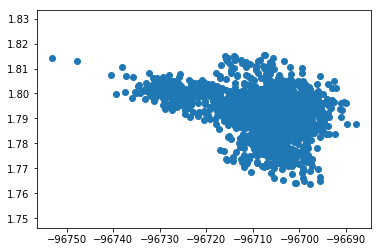



forces error for train train:	11.931747436523438
forces error for test train:	8.066463470458984
energy correlation for test train:	-0.41169585992680957


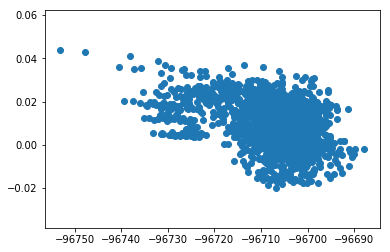



forces error for train train:	11.921521186828613
forces error for test train:	8.135614395141602
energy correlation for test train:	-0.19798906413098655


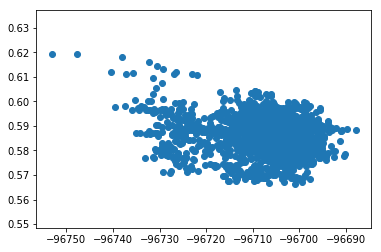



forces error for train train:	11.868314743041992
forces error for test train:	8.08764934539795
energy correlation for test train:	-0.20701088437315138


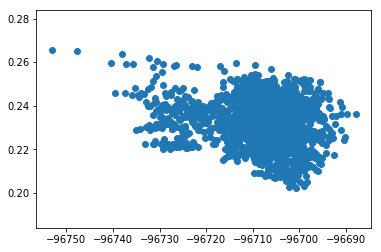



forces error for train train:	11.868314743041992
forces error for test train:	8.08764934539795
energy correlation for test train:	-0.20701088437315138


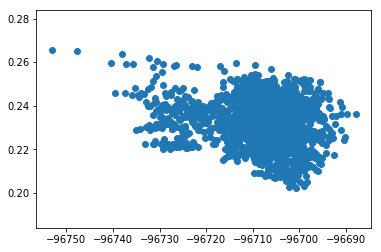



forces error for train train:	11.750787734985352
forces error for test train:	7.991349697113037
energy correlation for test train:	-0.19897467380543482


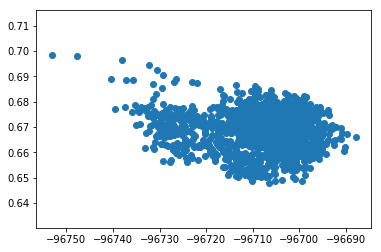



forces error for train train:	11.750787734985352
forces error for test train:	7.991349697113037
energy correlation for test train:	-0.19897467380543482


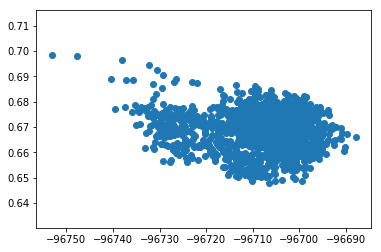



forces error for train train:	11.750787734985352
forces error for test train:	7.991349697113037
energy correlation for test train:	-0.19897467380543482


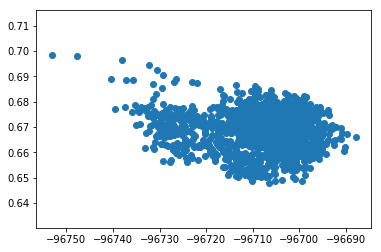



forces error for train train:	11.750787734985352
forces error for test train:	7.991349697113037
energy correlation for test train:	-0.19897467380543482


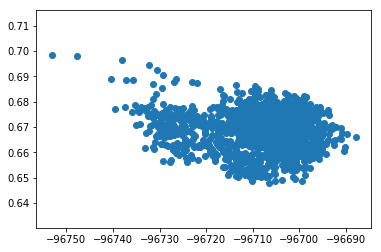



forces error for train train:	11.743500709533691
forces error for test train:	7.9865899085998535
energy correlation for test train:	-0.06518027624739325


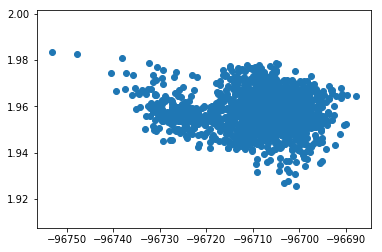



forces error for train train:	11.743500709533691
forces error for test train:	7.9865899085998535
energy correlation for test train:	-0.06518027624739325


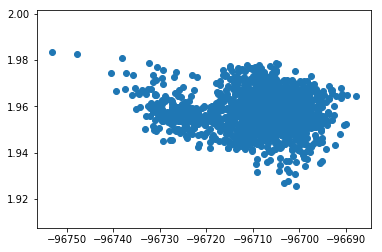



forces error for train train:	11.743500709533691
forces error for test train:	7.9865899085998535
energy correlation for test train:	-0.06518027624739325


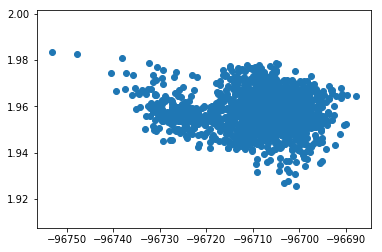



forces error for train train:	11.71357250213623
forces error for test train:	7.938943386077881
energy correlation for test train:	-0.5671321725807846


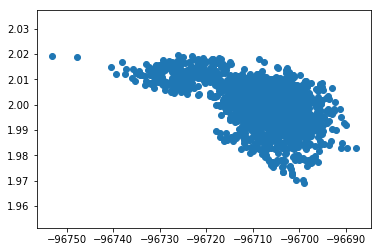



forces error for train train:	11.591761589050293
forces error for test train:	7.867865085601807
energy correlation for test train:	-0.47695884642308556


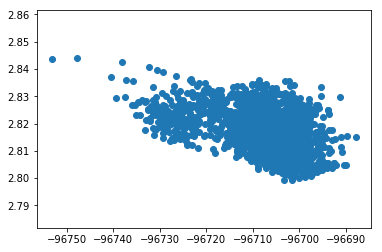



forces error for train train:	11.363061904907227
forces error for test train:	7.7795844078063965
energy correlation for test train:	-0.3139498163619015


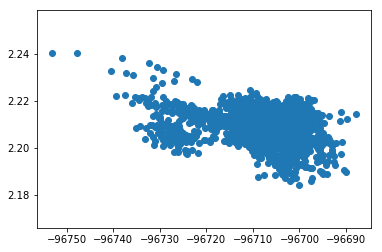



forces error for train train:	11.363061904907227
forces error for test train:	7.7795844078063965
energy correlation for test train:	-0.3139498163619015


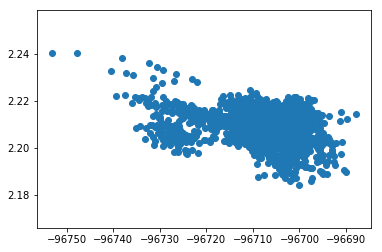



forces error for train train:	11.363061904907227
forces error for test train:	7.7795844078063965
energy correlation for test train:	-0.3139498163619015


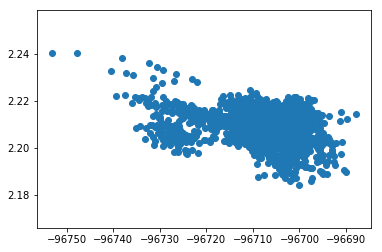



forces error for train train:	11.363061904907227
forces error for test train:	7.7795844078063965
energy correlation for test train:	-0.3139498163619015


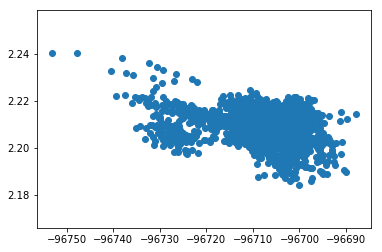



forces error for train train:	11.363061904907227
forces error for test train:	7.7795844078063965
energy correlation for test train:	-0.3139498163619015


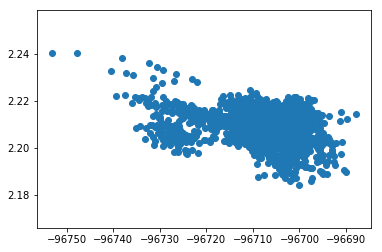



forces error for train train:	11.363061904907227
forces error for test train:	7.7795844078063965
energy correlation for test train:	-0.3139498163619015


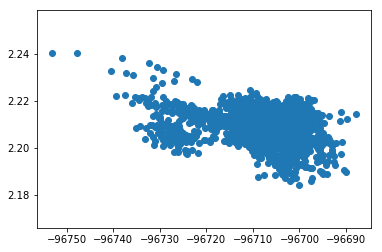



forces error for train train:	11.363061904907227
forces error for test train:	7.7795844078063965
energy correlation for test train:	-0.3139498163619015


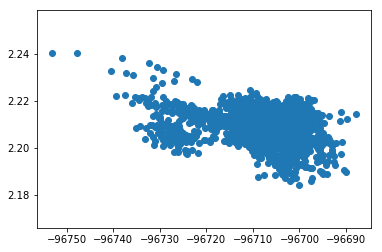

In [ ]:
de = DE(all_coords, struct_description, amber_coeffs, forces, test_structs)
l_bonds = len(amber_coeffs.bonds_zero_values)
l_angles = len(amber_coeffs.angles_zero_values)
l_torsions = len(amber_coeffs.torsions_zero_phase)
l_q = len(amber_coeffs.qs)
l_sigma = len(amber_coeffs.sigma_for_vdw)
l_epsilon = len(amber_coeffs.epsilons_for_vdw)

k = l_bonds + l_angles + l_torsions + l_q + l_sigma + l_epsilon + 1

de.run(k, 10)